In [62]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(stringr))
library(plyr)
library(purrr)
library(ggplot2)
library(patchwork)

In [63]:
color_annotation<-read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

In [64]:
df<-read.csv("04_DEG_AgeGroup_CMVneg_vs_CMVpos/DEG_Counts.csv")

In [65]:
df_BR1<-df[c('celltype','BR1_counts')]
df_BR2<-df[c('celltype','BR2_counts')]
df_BR1$`Age Group`<-'Young'
df_BR2$`Age Group`<-'Older'


colnames(df_BR1)<-c('celltype','counts','Age Group')
colnames(df_BR2)<-c('celltype','counts','Age Group')
df<-rbind(df_BR1,df_BR2)

In [66]:
df$celltype<-factor(df$celltype,levels=color_annotation$label)

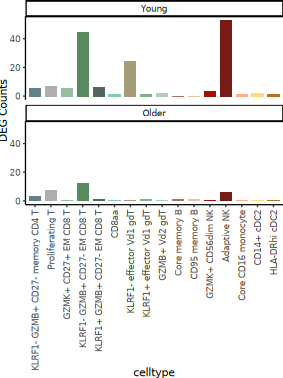

In [67]:
options(repr.plot.width = 60/25.4, repr.plot.height =  80/25.4)
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

p <- ggplot(df, aes(x = celltype, y =counts, fill = celltype)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = color_vector) +  
theme_classic(base_size=6)+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
theme(plot.margin=grid::unit(c(0,0,0,-.25), "mm"))+   

ylab('DEG Counts')+
theme(legend.position="none")+
  theme(legend.key.size = unit(2, 'mm'))+facet_wrap(~`Age Group`,ncol=1)+scale_x_discrete(labels = function(x) gsub(" cell", "", x))
p
ggsave('FigureF.pdf',p,width = 60/25.4,height = 80/25.4)